In [1]:
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV   #Perforing grid search


In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
import xgboost

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

In [3]:
pylab.rcParams['figure.figsize'] = 12,8

%matplotlib inline
#%matplotlib notebook
import mpld3
mpld3.enable_notebook()
import IPython
from IPython import display

In [4]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# serif, sans-serif, monospace
print('serif 세리프가 있는 폰트--------')
print (plt.rcParams['font.serif']) 
print('sans-serif 세리프가 없는 폰트 --------')
print (plt.rcParams['font.sans-serif']) 
print('monospace 고정폭 글꼴--------')
print (plt.rcParams['font.monospace'])



plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)

path = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)


# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['sans-serif']
serif 세리프가 있는 폰트--------
['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
sans-serif 세리프가 없는 폰트 --------
['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
monospace 고정폭 글꼴--------
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']
NanumGothic


In [5]:
%matplotlib widget

In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib

#misc libraries
import random
import time

In [7]:
import os
os.getcwd()
os.chdir(r"C:\Users\nilsi\Desktop\Project")
#os.listdir()

In [8]:
DF=pd.read_csv('preprocessing_complete3.csv',encoding='CP949')

In [9]:
DF=DF.drop(['Unnamed: 0'],axis=1)

In [10]:
label=pd.read_csv('prepro4.csv',encoding='CP949')

#두께/무게/배터리의 분포가 평균을 중심으로 균등하게 분포하고 있음을 확인

plt.figure()

#plt.hist(DF['두께'], bins=50)
#plt.hist(DF['무게'], bins=50)
plt.hist(DF['배터리'], bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');


plt.show()

In [11]:
DF['제조사']=label['제조사']

In [12]:
DF['RAM']=DF['RAM'].mask(DF['RAM']==0).fillna(DF['RAM'].mean())
DF['두께']=DF['두께'].mask(DF['두께']==0).fillna(DF['두께'].mean())
DF['배터리']=DF['배터리'].mask(DF['배터리']==0).fillna(DF['배터리'].mean())


In [13]:
#DF.columns.get_loc("제조사_ACER")
#DF.columns.get_loc("제조사_한성컴퓨터")

DF_1=DF.iloc[:, np.r_[0:19, 30:31]]

In [14]:
DF1=DF
DF=DF.drop(['제조사'],axis=1)

In [15]:
DF_1['제조사'] = DF_1['제조사'].apply(lambda x: '기타' if x == 'AORUS' else x )
DF_1['제조사'] = DF_1['제조사'].apply(lambda x: '기타' if x == 'GIGABYTE' else x )
DF_1['제조사'] = DF_1['제조사'].apply(lambda x: '기타' if x == 'JDL' else x )
DF_1['제조사'] = DF_1['제조사'].apply(lambda x: '기타' if x == 'MPGIO' else x )
DF_1['제조사'] = DF_1['제조사'].apply(lambda x: '기타' if x == 'Microsoft' else x )
DF_1['제조사'] = DF_1['제조사'].apply(lambda x: '기타' if x == 'Razer' else x )
DF_1['제조사'] = DF_1['제조사'].apply(lambda x: '기타' if x == '디지탈클릭' else x )
DF_1['제조사'] = DF_1['제조사'].apply(lambda x: '기타' if x == '주연테크' else x )
DF_1['제조사'] = DF_1['제조사'].apply(lambda x: '기타' if x == '포유디지탈' else x )
DF_1['제조사'] = DF_1['제조사'].apply(lambda x: '기타' if x == '이그닉' else x )
DF_1['제조사'] = DF_1['제조사'].apply(lambda x: '기타' if x == '샤오미' else x )
DF_1['제조사'] = DF_1['제조사'].apply(lambda x: '기타' if x == '정현씨앤씨' else x )


DF.to_csv('Laptop_1.csv',encoding="CP949")

In [16]:
data1 = DF.copy(deep = True)

#preview data
print(DF.info()) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
DF.sample(10) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3398 entries, 0 to 3397
Data columns (total 30 columns):
인텔CPU여부      3398 non-null int64
코어타입         3398 non-null int64
RAM          3398 non-null float64
DDR4여부       3398 non-null int64
HDD          3398 non-null int64
SSD          3398 non-null float64
VRAM         3398 non-null int64
배터리          3398 non-null float64
운영체제         3398 non-null int64
무게           3398 non-null float64
보증기간         3398 non-null int64
두께           3398 non-null float64
가격           3398 non-null int64
CPU라인        3398 non-null float64
CPU세대        3398 non-null int64
클럭속도         3398 non-null float64
클럭최대         3398 non-null float64
모니터넓이        3398 non-null float64
해상도          3398 non-null int64
제조사_ACER     3398 non-null int64
제조사_APPLE    3398 non-null int64
제조사_ASUS     3398 non-null int64
제조사_DELL     3398 non-null int64
제조사_HP       3398 non-null int64
제조사_LG전자     3398 non-null int64
제조사_MSI      3398 non-null int64
제조사_기타       3398

,인텔CPU여부,코어타입,RAM,DDR4여부,HDD,SSD,VRAM,배터리,운영체제,무게,...,제조사_APPLE,제조사_ASUS,제조사_DELL,제조사_HP,제조사_LG전자,제조사_MSI,제조사_기타,제조사_레노버,제조사_삼성전자,제조사_한성컴퓨터
820,1,4,8.0,1,0,240.0,4,47.000000,1,2340.0,...,0,0,0,0,0,0,0,0,0,1
889,1,4,4.0,1,0,256.0,2,41.000000,0,1850.0,...,0,0,0,1,0,0,0,0,0,0
862,1,4,16.0,1,0,512.0,2,75.000000,1,1290.0,...,0,0,0,0,0,0,0,0,1,0
174,1,4,16.0,1,0,512.0,4,82.000000,0,1600.0,...,0,0,0,0,0,1,0,0,0,0
2678,1,2,4.0,1,0,256.0,0,41.217905,1,1890.0,...,0,0,0,0,1,0,0,0,0,0
534,1,6,8.0,1,0,256.0,8,51.000000,0,2890.0,...,0,0,0,0,0,1,0,0,0,0
2615,1,6,8.0,1,1000,128.0,4,56.000000,1,3270.0,...,0,0,1,0,0,0,0,0,0,0
227,1,4,8.0,1,0,256.0,2,43.000000,1,1900.0,...,0,0,0,0,0,0,0,0,1,0
3382,1,4,8.0,1,0,256.0,0,60.000000,1,1090.0,...,0,0,0,0,1,0,0,0,0,0
1237,1,4,4.0,1,0,256.0,0,41.000000,0,1470.0,...,0,0,0,1,0,0,0,0,0,0


In [17]:
#DF.columns.get_loc("가격")
#DF.loc[:, DF.columns != '가격']

In [18]:
print('null값이 있는 데이터의 칼럼들:\n', data1.isnull().sum())
print("-"*10)


data1.describe(include = 'all')


null값이 있는 데이터의 칼럼들:
 인텔CPU여부      0
코어타입         0
RAM          0
DDR4여부       0
HDD          0
SSD          0
VRAM         0
배터리          0
운영체제         0
무게           0
보증기간         0
두께           0
가격           0
CPU라인        0
CPU세대        0
클럭속도         0
클럭최대         0
모니터넓이        0
해상도          0
제조사_ACER     0
제조사_APPLE    0
제조사_ASUS     0
제조사_DELL     0
제조사_HP       0
제조사_LG전자     0
제조사_MSI      0
제조사_기타       0
제조사_레노버      0
제조사_삼성전자     0
제조사_한성컴퓨터    0
dtype: int64
----------


,인텔CPU여부,코어타입,RAM,DDR4여부,HDD,SSD,VRAM,배터리,운영체제,무게,...,제조사_APPLE,제조사_ASUS,제조사_DELL,제조사_HP,제조사_LG전자,제조사_MSI,제조사_기타,제조사_레노버,제조사_삼성전자,제조사_한성컴퓨터
count,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,...,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000
mean,0.953502,3.622131,8.792463,0.735433,188.787522,254.507357,1.789288,49.818109,0.702472,1757.185812,...,0.024426,0.092702,0.046498,0.101530,0.134491,0.057387,0.025015,0.133314,0.312831,0.047087
std,0.210592,1.517130,5.703360,0.441168,405.345067,211.020229,2.574365,14.545044,0.457238,608.639697,...,0.154391,0.290056,0.210592,0.302074,0.341229,0.232614,0.156193,0.339963,0.463714,0.211855
min,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,690.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,8.000000,0.000000,0.000000,128.000000,0.000000,41.217905,0.000000,1290.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.000000,8.000000,1.000000,0.000000,256.000000,0.000000,43.000000,1.000000,1790.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,8.000000,1.000000,0.000000,256.000000,4.000000,56.000000,1.000000,2100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,8.000000,64.000000,1.000000,2000.000000,6000.000000,16.000000,97.000000,1.000000,5700.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
#split train and test data with function defaults

Target = ['가격']
Input=list(data1.loc[:,data1.columns != '가격'].columns)

train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1.loc[:, data1.columns != '가격'], data1['가격'], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))
print("target Shape: {}".format(train1_y.shape))
print("target Shape: {}".format(test1_y.shape))


Data1 Shape: (3398, 30)
Train1 Shape: (2548, 29)
Test1 Shape: (850, 29)
target Shape: (2548,)
target Shape: (850,)


# PCA 사용, 제조사별 시각화

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [20]:
finalDf = pd.concat([principalDf, DF1['제조사']], axis = 1)

In [21]:
fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = list(DF1['제조사'].unique())

colors = ['r', 'g', 'b' , 'y','k','grey','c','m','gold','lime']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['제조사'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# 3D PCA

In [41]:
import seaborn as sns
sns.set_style("white")
from mpl_toolkits.mplot3d import Axes3D

my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)


<Figure size 480x480 with 0 Axes>

<Figure size 480x480 with 0 Axes>

In [42]:
df = sns.load_dataset('iris')
#type(df['species'].cat.codes)
type(DF1['제조사'].astype('category').cat.codes)

pandas.core.series.Series

In [43]:
# Run The PCA
pca = PCA(n_components=3)
pca.fit(data1)

# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(data1), columns=['PCA%i' % i for i in range(3)], index=data1.index)
my_color=DF1['제조사'].astype('category').cat.codes


Text(0.5, 0.92, 'PCA on the iris data set')

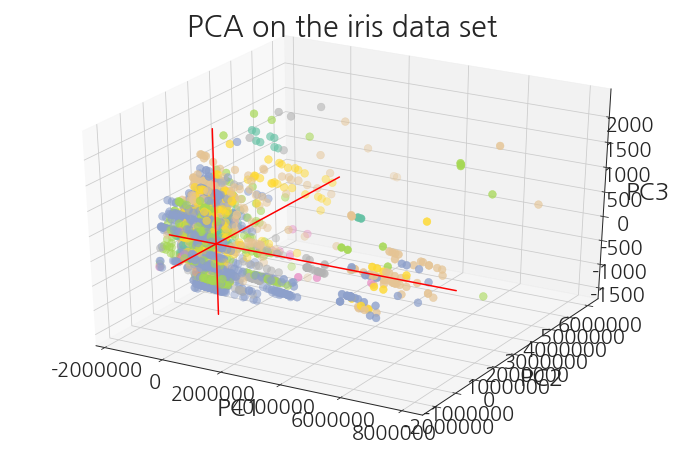

In [51]:
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
#plt.show()

# CPU 제조사 별 코어타입 가격 분포

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

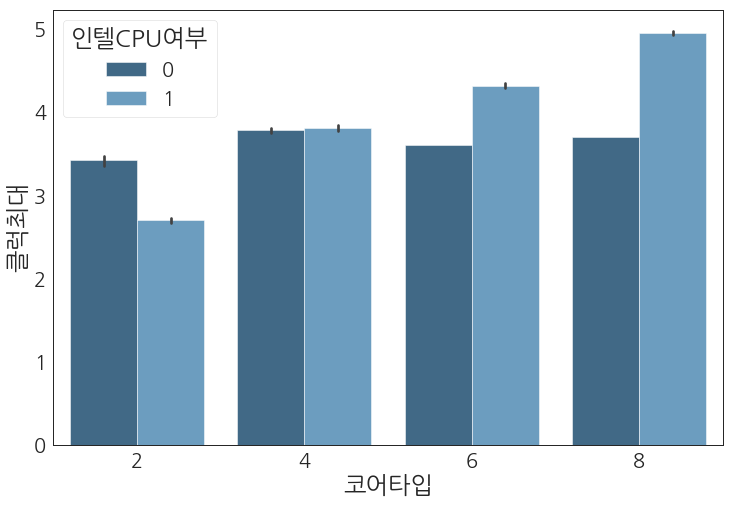

In [28]:
plt.figure()


sns.barplot(data=DF_1, x="코어타입", y="클럭최대",hue="인텔CPU여부",palette="Blues_d")
#sns.boxplot(x="제조사", y="가격", data=DF_1)
#sns.violinplot(x="제조사", y="가격", data=DF_1)

plt.show()

# CPU 타입 별 가격 분포

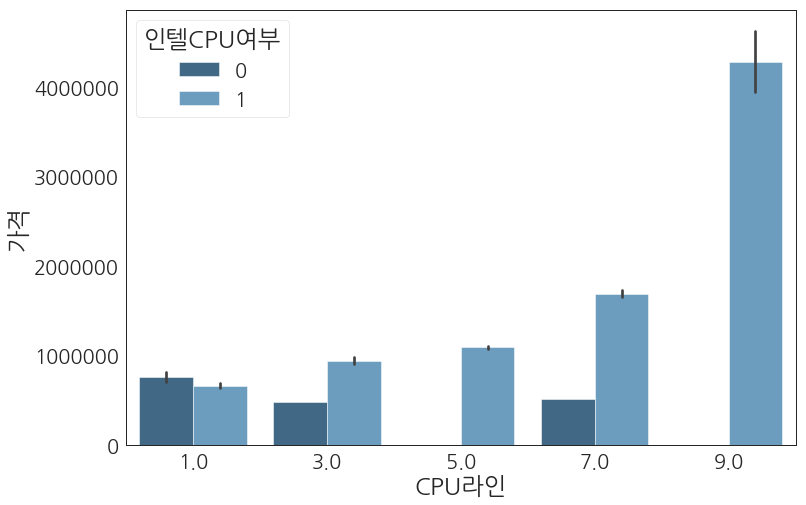

In [58]:
plt.figure()

sns.barplot(data=DF_1, x="CPU라인", y="가격",hue="인텔CPU여부",palette="Blues_d")
#sns.boxplot(x="제조사", y="가격", data=DF_1)
#sns.violinplot(x="제조사", y="가격", data=DF_1)

plt.show()

# 제조사별 가격 분포

In [43]:
DF_1.drop(DF_1.loc[DF_1['가격']>3000000].index, inplace=True)
DF_1.drop(DF_1.loc[DF_1['가격']<300000].index, inplace=True)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

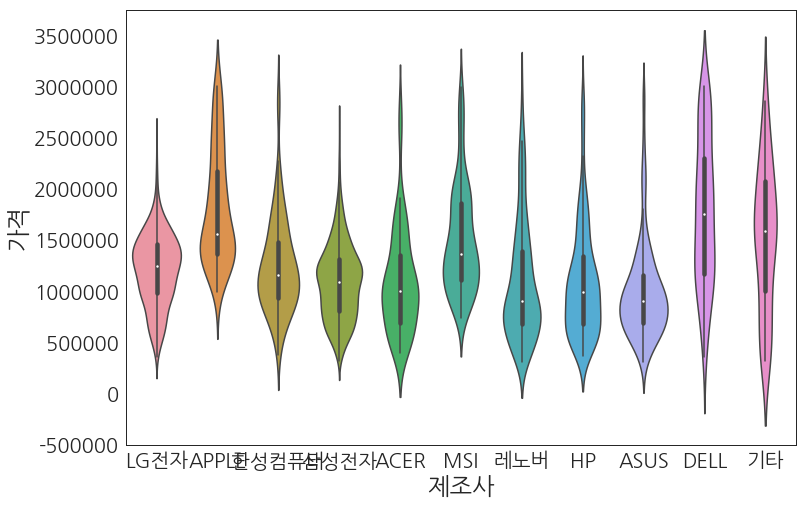

In [44]:
plt.figure()

#sns.barplot(data=DF_1, x="제조사", y="가격",palette="Blues_d")
#sns.boxplot(x="제조사", y="가격", data=DF_1)
sns.violinplot(x="제조사", y="가격", data=DF_1)

plt.show()

# 제조사별 무게 분포

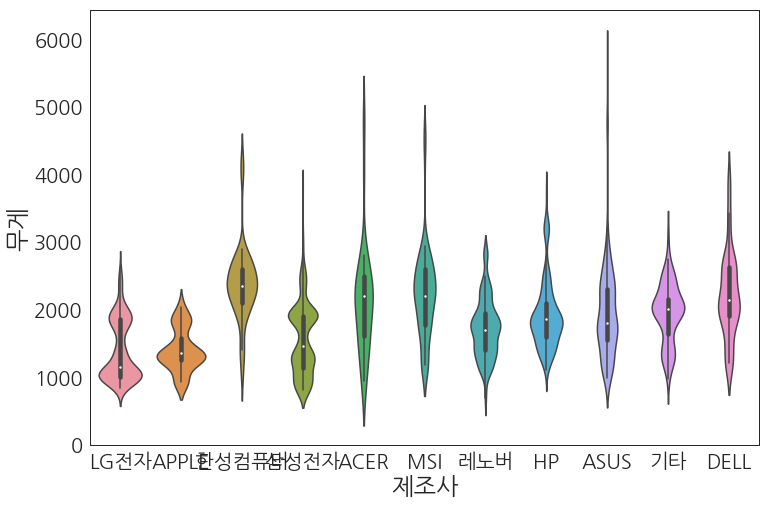

In [50]:
plt.figure()

sns.violinplot(x="제조사", y="무게", data=DF_1)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

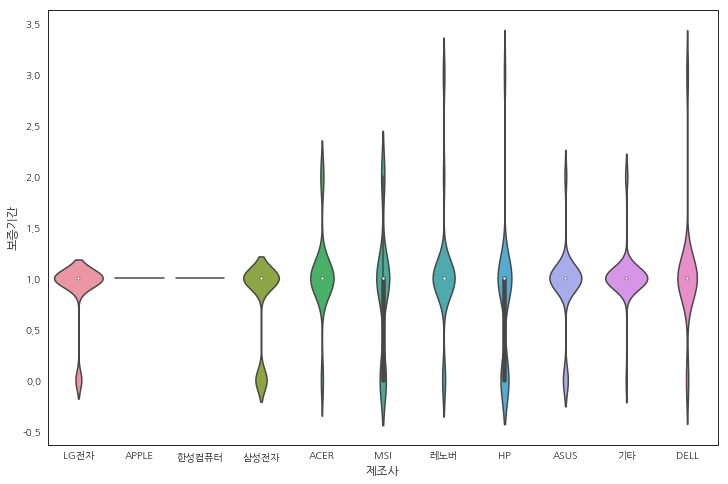

In [204]:
plt.figure()

sns.violinplot(x="제조사", y="보증기간", data=DF_1)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

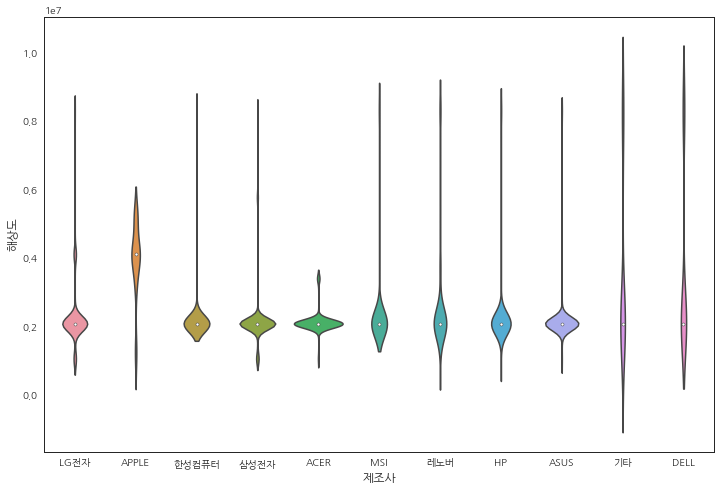

In [205]:
plt.figure()

sns.violinplot(x="제조사", y="해상도", data=DF_1)

plt.show()

# correlation matrix

In [69]:
#correlation heatmap of dataset
#데이터셋의 상관관계 히트맵

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':10 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)


In [71]:
heatmap=['인텔CPU여부','RAM','SSD','VRAM','무게','CPU라인','CPU세대','클럭속도','해상도','가격']
DF_heatmap=DF[heatmap]

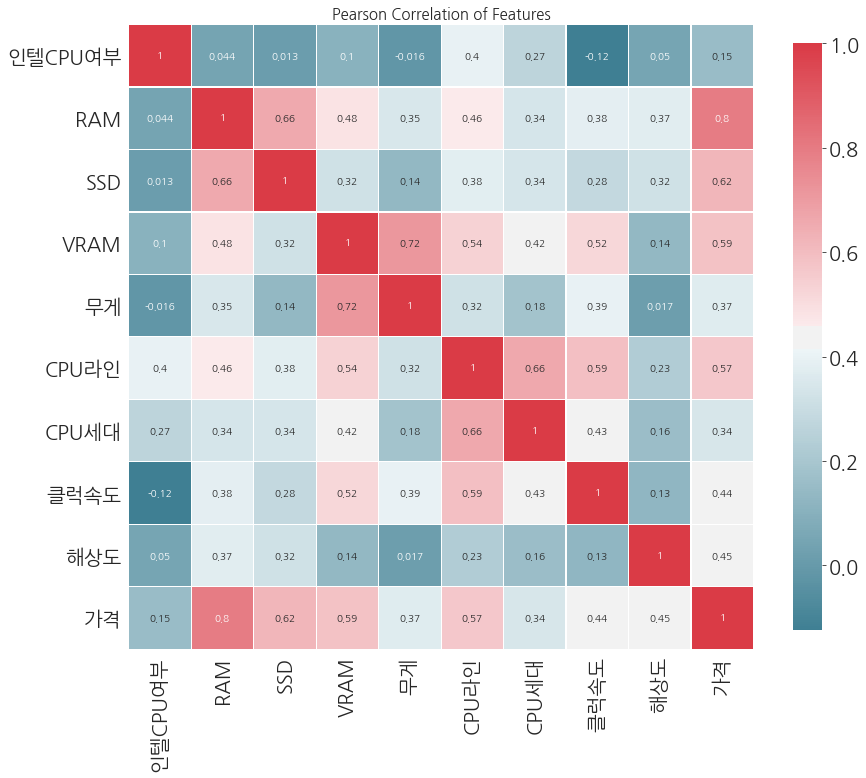

In [72]:
correlation_heatmap(DF_heatmap)


# K-means 알고리즘, 몇개로 나누어야 제일 적절한가?

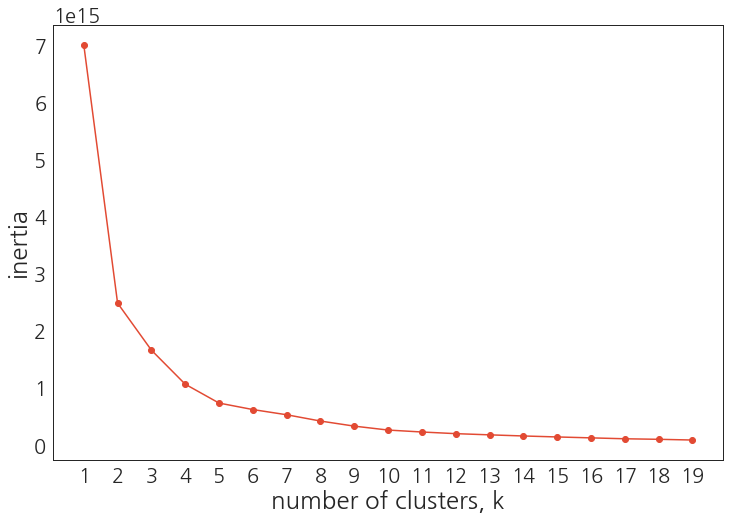

In [73]:
#커브가 5에서 급격히 줄어듦을 알 수 있음.

from sklearn.cluster import KMeans
plt.figure()

ks = range(1,20)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(DF)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)

plt.show()

# 계층 군집화를 통한 IDE

In [78]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data1)

array([0, 4, 2, ..., 2, 4, 2], dtype=int64)

In [75]:
print(Input)

['인텔CPU여부', '코어타입', 'RAM', 'DDR4여부', 'HDD', 'SSD', 'VRAM', '배터리', '운영체제', '무게', '보증기간', '두께', 'CPU라인', 'CPU세대', '클럭속도', '클럭최대', '모니터넓이', '해상도', '제조사_ACER', '제조사_APPLE', '제조사_ASUS', '제조사_DELL', '제조사_HP', '제조사_LG전자', '제조사_MSI', '제조사_기타', '제조사_레노버', '제조사_삼성전자', '제조사_한성컴퓨터']


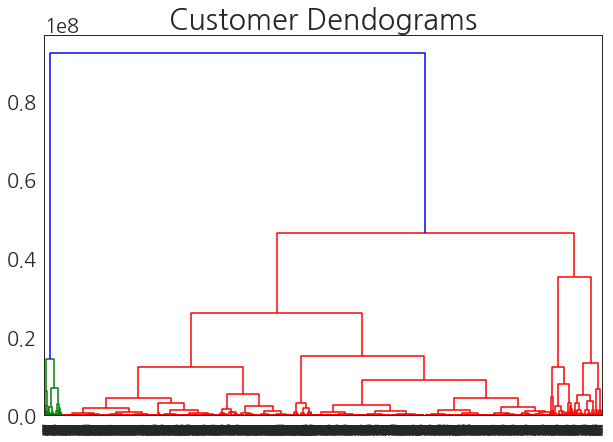

In [76]:
#5개로 나누는 것이 적절해 보임
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data1,method='ward'))

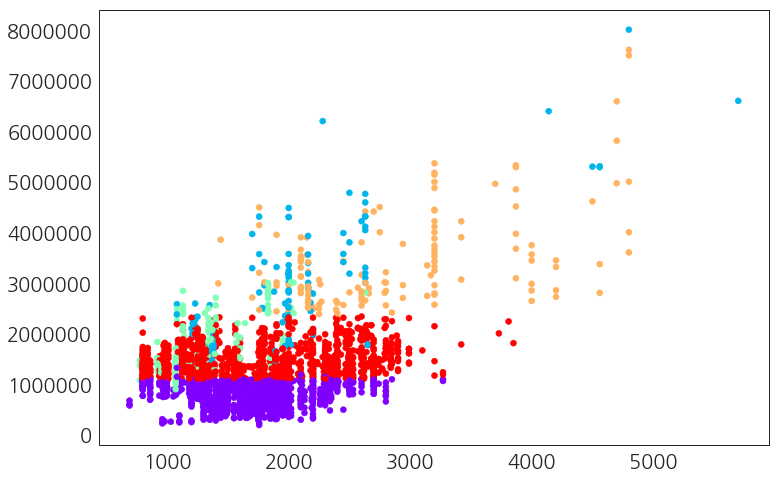

In [79]:
# 5개로 나누어 표현한 결과, 저가형(100만원 미만)과 중가형(100~200) 그리고 가벼운 중고가형(연녹) 무거운 고가형(주황색), 성능 위주형(파란색)  
plt.figure()
plt.scatter(data1['무게'],data1['가격'], c=cluster.labels_, cmap='rainbow')
plt.show()


In [89]:
label=pd.DataFrame(cluster.labels_)

In [91]:
data1['label']=label

In [102]:
data1[data1['label']==1].iloc[:,3:]

,DDR4여부,HDD,SSD,VRAM,배터리,운영체제,무게,보증기간,두께,가격,...,제조사_ASUS,제조사_DELL,제조사_HP,제조사_LG전자,제조사_MSI,제조사_기타,제조사_레노버,제조사_삼성전자,제조사_한성컴퓨터,label
93,1,0,256.0,6,94.240000,0,2000.000000,1,20.00,1875000,...,0,0,0,0,0,1,0,0,0,1
99,1,0,512.0,4,97.000000,1,1800.000000,1,17.00,2476000,...,0,1,0,0,0,0,0,0,0,1
105,0,0,512.0,0,41.217905,1,1200.000000,1,12.20,2084000,...,0,0,0,0,0,0,1,0,0,1
114,1,0,1000.0,8,94.240000,0,2000.000000,1,20.00,4290000,...,0,0,0,0,0,1,0,0,0,1
161,1,0,1000.0,4,97.000000,1,1800.000000,1,17.00,3400000,...,0,1,0,0,0,0,0,0,0,1
178,1,0,512.0,8,94.240000,0,2000.000000,1,20.00,3187000,...,0,0,0,0,0,1,0,0,0,1
181,1,0,512.0,0,41.217905,1,1210.000000,1,13.90,1390000,...,0,0,0,0,0,0,1,0,0,1
210,1,1000,512.0,8,75.000000,1,4560.000000,2,58.00,5277000,...,0,0,0,0,1,0,0,0,0,1
308,1,2000,512.0,6,62.000000,1,2200.000000,1,29.50,2070000,...,0,0,0,0,0,0,0,0,1,1
322,1,1000,512.0,8,90.000000,1,4500.000000,0,42.00,5288000,...,0,0,0,0,1,0,0,0,0,1


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

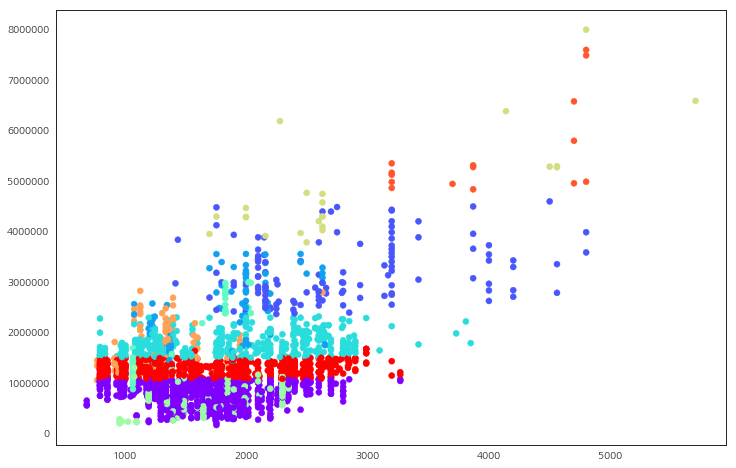

In [170]:
# 10개로 나누어 표현한 결과.. 이러면 걍 브랜드별로 보는게 낫긴함;
plt.figure()
plt.scatter(data1['무게'],data1['가격'], c=cluster.labels_, cmap='rainbow')
plt.show()


# 머신러닝 모델링 구간

# XGBOOST GridSearch

In [22]:
#train1_x, test1_x, train1_y, test1_y
train_x=train1_x[Input]
train_y=train1_y

#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2],
    'reg_lambda':[1e-5, 1e-2],
    'subsample':[0.6,0.95]  
}

                    
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

In [292]:
test_y=pd.DataFrame()
test_y['Prediction'] = gsearch1.predict(test1_x[Input])
sk.metrics.r2_score(test1_y, test_y, sample_weight=None, multioutput='uniform_average')

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [273]:
test_y=pd.DataFrame()
test_y['Prediction'] = best_xgb_model.predict(test1_x[Input])
sk.metrics.r2_score(test1_y, test_y, sample_weight=None, multioutput='uniform_average')

0.9313961170548163

In [105]:
gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(train_x,train_y)

# Grid Search한 모델 저장하기

In [149]:
# Import pickle Package

import pickle
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(gsearch1, file)

# Load the Model back from file
#with open(Pkl_Filename, 'rb') as file:  
#    Pickled_LR_Model = pickle.load(file)

#Pickled_LR_Model

In [150]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model.best_params_

[11:29:17] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1.5,
 'n_estimators': 10000,
 'reg_alpha': 1e-05,
 'reg_lambda': 1e-05,
 'subsample': 0.6}

In [106]:
#print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

In [117]:
gsearch1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=6, objective='reg:linear', random_state=0,
       reg_alpha=1e-05, reg_lambda=1e-05, scale_pos_weight=1, seed=27,
       silent=None, subsample=0.6, verbosity=1)

# XGBoost

In [23]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(train_x,train_y)

[15:02:15] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0,
       importance_type='gain', learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=None, subsample=0.6, verbosity=1)

In [24]:

test_y=pd.DataFrame()

#fit model to training data
#best_xgb_model.fit(data1[Input],data1[Target])

#test our model on the test datatest_y=pd.DataFrame()
test_y['Prediction'] = best_xgb_model.predict(data1[Input])

sk.metrics.r2_score(data1[Target], test_y, sample_weight=None, multioutput='uniform_average')

0.9759183571424541

# LASSO

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
params_lasso = {'alpha': np.arange(0, 1,0.1)}

lasso_gs = GridSearchCV(lasso, params_lasso, cv=5)

lasso_gs.fit(train_x,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
test_y=pd.DataFrame()
test_y['Prediction'] = lasso_gs.predict(test1_x[Input])
sk.metrics.r2_score(test1_y, test_y, sample_weight=None, multioutput='uniform_average')

0.8183296851138046

# RIDGE

In [30]:
ridge = linear_model.Ridge(alpha=1.0)

params_ridge = {'alpha': np.arange(0,2,0.2)}

ridge_gs = GridSearchCV(ridge, params_lasso, cv=5)

ridge_gs.fit(train_x,train_y)

test_y=pd.DataFrame()
test_y['Prediction'] = ridge_gs.predict(test1_x[Input])
sk.metrics.r2_score(test1_y, test_y, sample_weight=None, multioutput='uniform_average')



0.8183128472071963

# Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
test_y=pd.DataFrame()
test_y['Prediction'] = regr.predict(test1_x[Input])
sk.metrics.r2_score(test1_y, test_y, sample_weight=None, multioutput='uniform_average')

0.6773091395556636

# Linear Regression

In [33]:

reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)

test_y=pd.DataFrame()
test_y['Prediction'] = reg.predict(test1_x[Input])
sk.metrics.r2_score(test1_y, test_y, sample_weight=None, multioutput='uniform_average')


0.8183293472842528

# SVR

In [34]:
from sklearn.svm import SVR
svr = SVR(gamma='scale', C=1.0, epsilon=0.2)
svr.fit(train_x, train_y)

test_y=pd.DataFrame()
test_y['Prediction'] = svr.predict(test1_x[Input])
sk.metrics.r2_score(test1_y, test_y, sample_weight=None, multioutput='uniform_average')


-0.030932043995180347

# ElasticNet

In [35]:
from sklearn.linear_model import ElasticNet

ela = ElasticNet(random_state=0)
ela.fit(train_x, train_y)

test_y=pd.DataFrame()
test_y['Prediction'] = ela.predict(test1_x[Input])
sk.metrics.r2_score(test1_y, test_y, sample_weight=None, multioutput='uniform_average')


0.7765561313665399

In [38]:
#Machine Learning Algorithm (MLA) Selection and Initialization
#머신러닝 알고리즘 선택과 시작

MLA = [linear_model.ElasticNet(),
       linear_model.LinearRegression(),
       linear_model.Ridge(),
       linear_model.Lasso(),
       svm.SVR(),
       xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42),
       ensemble.RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
       
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#교차검증 데이터셋을 해당 패키지로 분할:
#note: this is an alternative to train_test_split
#주의: 이 방법은 train_test_split 함수의 대안임
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#MLA 방법들의 비교를 위해 표 작성
#create table to compare MLA metrics
MLA_columns = ['알고리즘 이름', '알고리즘 패러미터','트레이닝 평균 스코어', '테스트 평균 스코어', '테스트 스코어 3*STD' ,'학습시간']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#MLA 예측 결과를 비교하기 위해 표 작성
#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
#MLA에 인덱스를 달고 표에 모형 성과를 저장
row_index = 0
for alg in MLA:

    #set name and parameters
    #이름과 파라미터 설정
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, '알고리즘 이름'] = MLA_name
    MLA_compare.loc[row_index, '알고리즘 패러미터'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    #교차 검증을 통해 모형을 평가
    cv_results = model_selection.cross_validate(alg, data1[Input], data1[Target], cv  = cv_split)

    MLA_compare.loc[row_index, '학습시간'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, '트레이닝 평균 스코어'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, '테스트 평균 스코어'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    #만약 편향 없는 무작위 표본일 경우, 평균으로부터 +- 3 표준편차 내에 통계적으로 99.7%의 표본이 존재해야함.
    MLA_compare.loc[row_index, '테스트 스코어 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    #발생 가장한 최악의 경우를 알아보자
    

    #save MLA predictions - see section 6 for usage
    #MLA 예측 결과를 저장 - 용법은 6장에 있음
    alg.fit(data1[Input], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[Input])
    
    row_index+=1

   
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
#테이블을 출력하고 분류
MLA_compare.sort_values(by = ['테스트 평균 스코어'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

[17:15:28] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:47] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:03] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:18] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:34] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:49] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:02] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linea

,알고리즘 이름,알고리즘 패러미터,트레이닝 평균 스코어,테스트 평균 스코어,테스트 스코어 3*STD,학습시간
5,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.991024,0.92355,0.0446392,13.8836
2,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.833906,0.816434,0.0492393,0.0060843
3,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.833909,0.816398,0.0492784,0.0906103
1,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.833909,0.816397,0.0492787,0.0063833
0,ElasticNet,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.801799,0.784243,0.0503883,0.00907617
6,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.684678,0.65915,0.0580916,0.21121
4,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",-0.0334335,-0.0253807,0.0299424,0.527591


In [39]:
   
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
#테이블을 출력하고 분류
MLA_compare.sort_values(by = ['테스트 평균 스코어'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,알고리즘 이름,알고리즘 패러미터,트레이닝 평균 스코어,테스트 평균 스코어,테스트 스코어 3*STD,학습시간
5,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.991024,0.92355,0.0446392,13.8836
2,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.833906,0.816434,0.0492393,0.0060843
3,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.833909,0.816398,0.0492784,0.0906103
1,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.833909,0.816397,0.0492787,0.0063833
0,ElasticNet,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.801799,0.784243,0.0503883,0.00907617
6,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.684678,0.65915,0.0580916,0.21121
4,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",-0.0334335,-0.0253807,0.0299424,0.527591


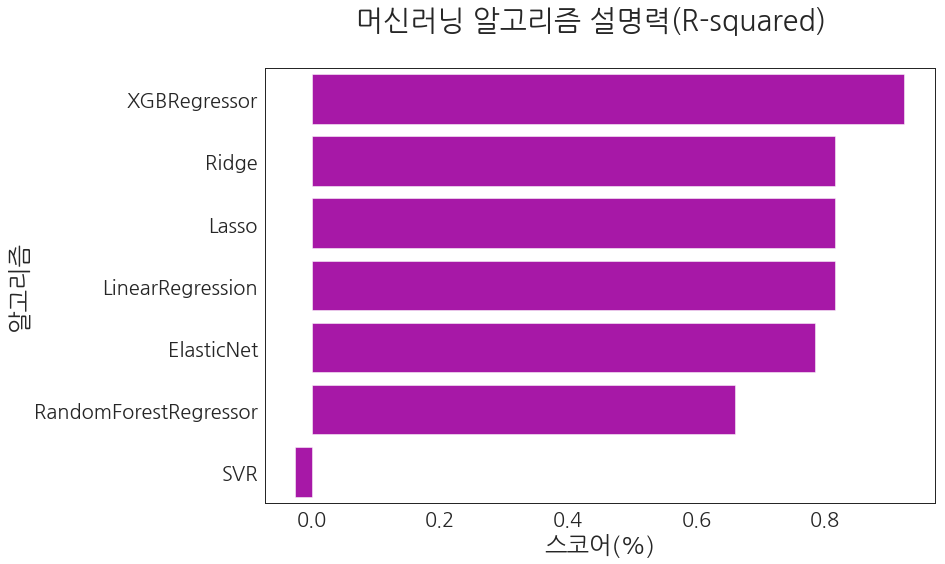

In [51]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
#barplot
plt.figure()


sns.barplot(x='테스트 평균 스코어', y = '알고리즘 이름', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('머신러닝 알고리즘 설명력(R-squared)  \n')
plt.xlabel('스코어(%)')
plt.ylabel('알고리즘')
plt.show()

# pariplot 나중에 해보기!

In [ ]:
#sns.pairplot(DF1, hue="제조사")
#plt.show()

# 앙상블 모델

In [126]:
gsearch1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=6, objective='reg:linear', random_state=0,
       reg_alpha=1e-05, reg_lambda=1e-05, scale_pos_weight=1, seed=27,
       silent=None, subsample=0.6, verbosity=1)

In [147]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('xgboost', gsearch1.best_estimator_),('lasso', lasso_gs.best_estimator_), ('ridge', ridge_gs.best_estimator_) ]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [148]:
#train_x = train_x.astype(int)
#train_y = train_y.astype(int)
#test1_x = test1_x.astype(int)

test_y=pd.DataFrame()
#test_y = test_y.astype(int)

#fit model to training data
ensemble.fit(train_x, train_y)

[11:22:18] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingClassifier(estimators=[('xgboost', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
      ...it_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [143]:
#test our model on the test datatest_y=pd.DataFrame()
test_y['Prediction'] = ensemble.predict(test1_x[Input].astype(float))
sk.metrics.r2_score(test1_y, test_y, sample_weight=None, multioutput='uniform_average')

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

# 가성비 지수

In [301]:
test_y.iloc[1]

Prediction    1333236.625
Name: 1, dtype: float32

In [307]:
data1[Target].iloc[1][0]-test_y.iloc[1][0]

-65236.625

In [ ]:
data1[Target].iloc[i]*0.01 < data1[Target].iloc[i]-test_y.iloc[i]

# 브랜드별 지수 계산

In [54]:

test_y=pd.DataFrame()

#fit model to training data
#best_xgb_model.fit(data1[Input],data1[Target])

#test our model on the test datatest_y=pd.DataFrame()
test_y['Prediction'] = best_xgb_model.predict(data1[Input])

sk.metrics.r2_score(data1[Target], test_y, sample_weight=None, multioutput='uniform_average')



0.9759183571424541

In [120]:
data1[Input].columns

Index(['인텔CPU여부', '코어타입', 'RAM', 'DDR4여부', 'HDD', 'SSD', 'VRAM', '배터리', '운영체제',
       '무게', '보증기간', '두께', 'CPU라인', 'CPU세대', '클럭속도', '클럭최대', '모니터넓이', '해상도',
       '제조사_ACER', '제조사_APPLE', '제조사_ASUS', '제조사_DELL', '제조사_HP', '제조사_LG전자',
       '제조사_MSI', '제조사_기타', '제조사_레노버', '제조사_삼성전자', '제조사_한성컴퓨터'],
      dtype='object')

In [38]:
laptop_1=[1,2,4,0,256,0,0,32,0,2000,1,22,1,4,1.5,2.3,30,100000,0,0,0,0,0,1,0,0,0,0,0]
laptop_1=pd.DataFrame(laptop_1)
laptop_1=laptop_1.T
laptop_1.columns=['인텔CPU여부', '코어타입', 'RAM', 'DDR4여부', 'HDD', 'SSD', 'VRAM', '배터리', '운영체제','무게', '보증기간', '두께', 'CPU라인', 'CPU세대', '클럭속도', '클럭최대', '모니터넓이', '해상도','제조사_ACER', '제조사_APPLE', '제조사_ASUS', '제조사_DELL', '제조사_HP', '제조사_LG전자','제조사_MSI', '제조사_기타', '제조사_레노버', '제조사_삼성전자', '제조사_한성컴퓨터']

In [39]:
best_xgb_model.predict(laptop_1)

array([800115.6], dtype=float32)

In [40]:
850000-800115.6

49884.40000000002

In [84]:
#실제 값에서 예측 값을 뺐을 때, 실제 값이 예측 값보다 비싸면 "비싸다"(2)
#반대로 예측 값이 더 크면, "싸다"(0)
#"오차범위 이내다" (1)

wow=[]

for i in range(len(data1)):
    if data1[Target].iloc[i][0]-test_y.iloc[i][0] > data1[Target].iloc[i][0]*0.01 :
        wow.append(0)
    elif data1[Target].iloc[i][0]-test_y.iloc[i][0] < - (data1[Target].iloc[i][0]*0.01)   :
        wow.append(2)
    else:
        wow.append(1)
        
        

In [86]:
wow[1]

2

In [87]:
wow=pd.DataFrame(wow)

In [88]:
wow[0].value_counts()

2    1477
0    1395
1     526
Name: 0, dtype: int64

In [91]:
wow=wow.astype('str')

In [92]:
wow=pd.get_dummies(wow)

In [93]:
wow

,0_0,0_1,0_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,1,0,0
7,0,0,1
8,1,0,0
9,1,0,0


In [94]:
DF_1['cheap']=wow['0_0']
DF_1['okay']=wow['0_1']
DF_1['expensive']=wow['0_2']


In [95]:
DF_1

,인텔CPU여부,코어타입,RAM,DDR4여부,HDD,SSD,VRAM,배터리,운영체제,무게,...,CPU라인,CPU세대,클럭속도,클럭최대,모니터넓이,해상도,제조사,cheap,okay,expensive
0,1,4,8.0,1,0,256.0,0,35.000000,0,1750.000000,...,5.0,8,1.60,3.9,39.62,2073600,LG전자,0,0,1
1,1,4,8.0,1,0,256.0,0,72.000000,0,1090.000000,...,5.0,8,1.60,3.9,39.62,2073600,LG전자,0,0,1
2,1,8,16.0,1,0,512.0,4,83.600000,1,1830.000000,...,9.0,9,2.30,4.8,39.11,5184000,APPLE,0,0,1
3,1,4,8.0,1,0,500.0,0,47.000000,0,1050.000000,...,5.0,8,1.60,3.9,35.56,2073600,한성컴퓨터,0,0,1
4,1,4,8.0,1,0,256.0,0,35.000000,1,1750.000000,...,5.0,8,1.60,3.9,39.62,2073600,LG전자,0,0,1
5,1,4,8.0,1,0,256.0,0,72.000000,0,1340.000000,...,5.0,8,1.60,3.9,43.18,4096000,LG전자,0,0,1
6,1,4,16.0,0,0,512.0,2,54.000000,1,1560.000000,...,7.0,8,1.80,4.6,38.10,2073600,삼성전자,1,0,0
7,1,6,16.0,1,0,256.0,4,83.600000,1,1830.000000,...,7.0,9,2.60,4.5,39.11,5184000,APPLE,0,0,1
8,1,4,8.0,1,0,256.0,0,72.000000,1,1090.000000,...,5.0,8,1.60,3.9,39.62,2073600,LG전자,1,0,0
9,1,4,8.0,1,0,500.0,2,91.240000,0,1400.000000,...,5.0,8,1.60,3.9,39.62,2073600,한성컴퓨터,1,0,0


In [96]:
DF_2=pd.DataFrame()
DF_2['제조사']=DF_1['제조사']

In [97]:
DF_2=pd.concat([DF_2,DF_1['cheap'],DF_1['okay'],DF_1['expensive']],axis=1)

In [98]:
DF_2

,제조사,cheap,okay,expensive
0,LG전자,0,0,1
1,LG전자,0,0,1
2,APPLE,0,0,1
3,한성컴퓨터,0,0,1
4,LG전자,0,0,1
5,LG전자,0,0,1
6,삼성전자,1,0,0
7,APPLE,0,0,1
8,LG전자,1,0,0
9,한성컴퓨터,1,0,0


In [99]:
is_it_cheap=DF_2.groupby('제조사').sum()


In [102]:
is_it_cheap['가성비지수']=is_it_cheap['cheap']/is_it_cheap['expensive']*100

In [103]:
is_it_cheap


,cheap,okay,expensive,가성비지수
제조사,,,,
ACER,38.0,9.0,37.0,102.702703
APPLE,46.0,6.0,31.0,148.387097
ASUS,126.0,47.0,142.0,88.732394
DELL,54.0,51.0,53.0,101.886792
HP,135.0,72.0,138.0,97.826087
LG전자,190.0,61.0,206.0,92.233010
MSI,78.0,35.0,82.0,95.121951
기타,31.0,23.0,31.0,100.000000
레노버,172.0,77.0,204.0,84.313725


In [73]:
is_it_cheap2=is_it_cheap.loc[['APPLE','LG전자','레노버','삼성전자'],:]

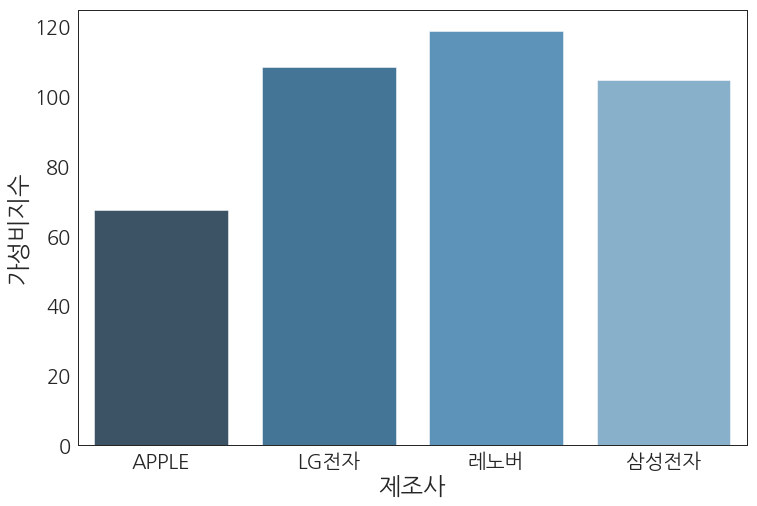

In [74]:
plt.figure()

sns.barplot(data=is_it_cheap2, x=is_it_cheap2.index, y="가성비지수",palette="Blues_d")
#sns.boxplot(x="제조사", y="가격", data=DF_1)
#sns.violinplot(x="제조사", y="가격", data=DF_1)

plt.show()

# ACER 가격 비중

<Figure size 864x576 with 0 Axes>

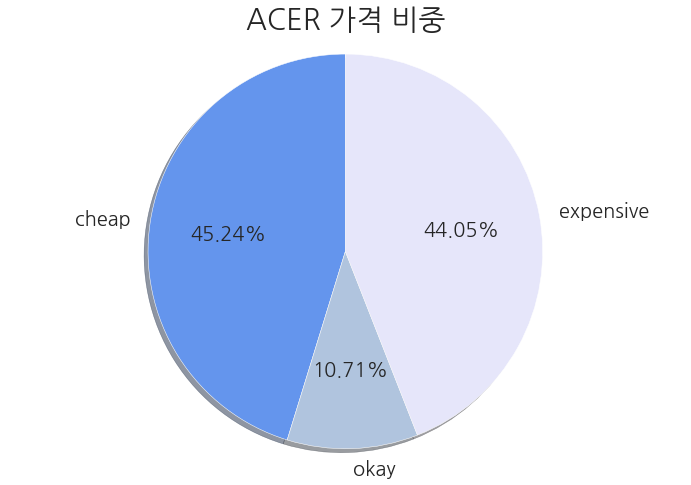

In [75]:
# The slice names of a population distribution pie chart
plt.figure()

pieLabels = 'cheap','okay','expensive'

# Population data

share     = [is_it_cheap.iloc[0][0],is_it_cheap.iloc[0][1],is_it_cheap.iloc[0][2]]

fig, ax = plt.subplots()

# Draw the pie chart

ax.pie(share,  labels=pieLabels, autopct='%1.2f%%', startangle=90,shadow=True, colors=["cornflowerblue","lightsteelblue","lavender"])
plt.title('ACER 가격 비중')
# Aspect ratio - equal means pie is a circle

ax.axis('equal')

plt.show()

# LG 가격 비중

<Figure size 864x576 with 0 Axes>

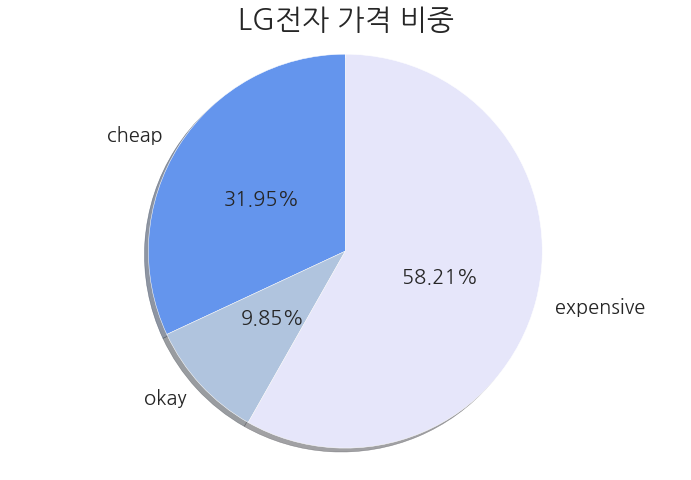

In [106]:
# The slice names of a population distribution pie chart
plt.figure()

pieLabels = 'cheap','okay','expensive'

# Population data

share = [is_it_cheap.iloc[5][0],is_it_cheap.iloc[5][1],is_it_cheap.iloc[5][2]]

fig, ax = plt.subplots()

# Draw the pie chart

ax.pie(share,  labels=pieLabels, autopct='%1.2f%%', startangle=90,shadow=True ,pctdistance = 0.5, colors=["cornflowerblue","lightsteelblue","lavender"])
plt.title('LG전자 가격 비중')
# Aspect ratio - equal means pie is a circle
mpl.rcParams['font.size'] = 20.0

ax.axis('equal')

plt.show()

# APPLE 가격 비중

<Figure size 864x576 with 0 Axes>

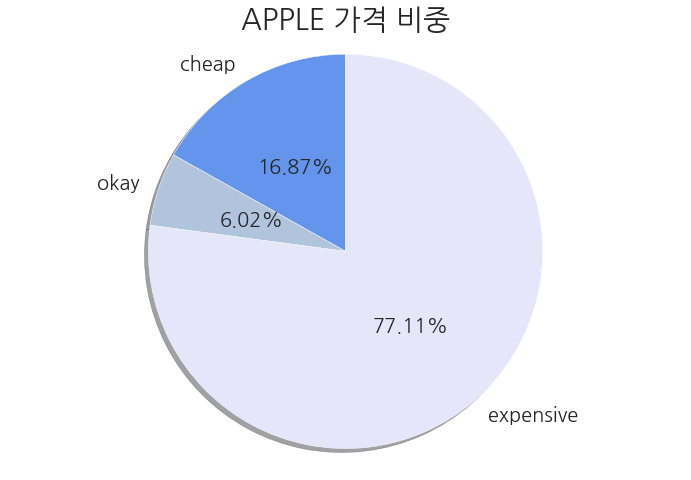

In [105]:
# The slice names of a population distribution pie chart
plt.figure()

pieLabels = 'cheap','okay','expensive'

# Population data

share     = [is_it_cheap.iloc[1][0],is_it_cheap.iloc[1][1],is_it_cheap.iloc[1][2]]

fig, ax = plt.subplots()

# Draw the pie chart

ax.pie(share,  labels=pieLabels, autopct='%1.2f%%', startangle=90,shadow=True ,pctdistance = 0.5, colors=["cornflowerblue","lightsteelblue","lavender"])
plt.title('APPLE 가격 비중')
# Aspect ratio - equal means pie is a circle
mpl.rcParams['font.size'] = 20.0

ax.axis('equal')

plt.show()

# 삼성전자 가격 비중

<Figure size 864x576 with 0 Axes>

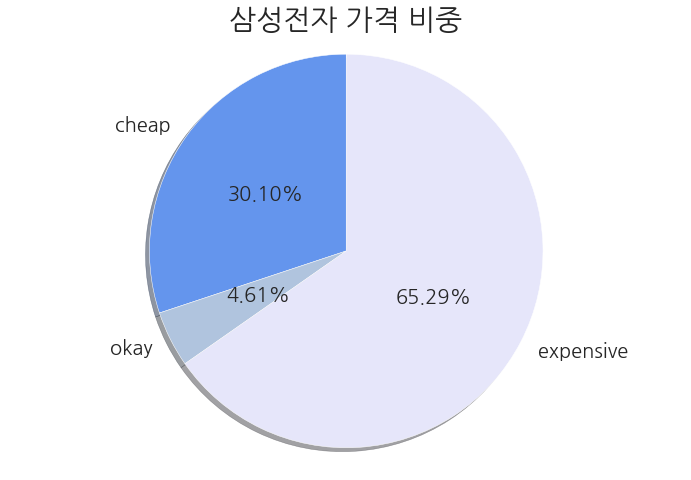

In [109]:
# The slice names of a population distribution pie chart
plt.figure()

pieLabels = 'cheap','okay','expensive'

# Population data

share     = [is_it_cheap.iloc[9][0],is_it_cheap.iloc[9][1],is_it_cheap.iloc[9][2]]

fig, ax = plt.subplots()

# Draw the pie chart

ax.pie(share,  labels=pieLabels, autopct='%1.2f%%', startangle=90,shadow=True ,pctdistance = 0.5, colors=["cornflowerblue","lightsteelblue","lavender"])
plt.title('삼성전자 가격 비중')
# Aspect ratio - equal means pie is a circle
mpl.rcParams['font.size'] = 20.0

ax.axis('equal')

plt.show()

# 레노버 가격 비중

<Figure size 864x576 with 0 Axes>

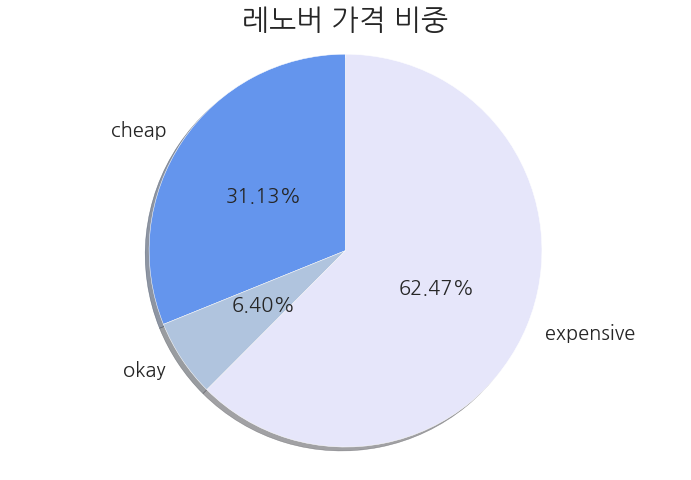

In [108]:
# The slice names of a population distribution pie chart
plt.figure()

pieLabels = 'cheap','okay','expensive'

# Population data

share     = [is_it_cheap.iloc[8][0],is_it_cheap.iloc[8][1],is_it_cheap.iloc[8][2]]

fig, ax = plt.subplots()

# Draw the pie chart

ax.pie(share,  labels=pieLabels, autopct='%1.2f%%', startangle=90,shadow=True ,pctdistance = 0.5, colors=["cornflowerblue","lightsteelblue","lavender"])
plt.title('레노버 가격 비중')
# Aspect ratio - equal means pie is a circle
mpl.rcParams['font.size'] = 20.0

ax.axis('equal')

plt.show()

# ASUS 가격 비중

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<Figure size 864x576 with 0 Axes>

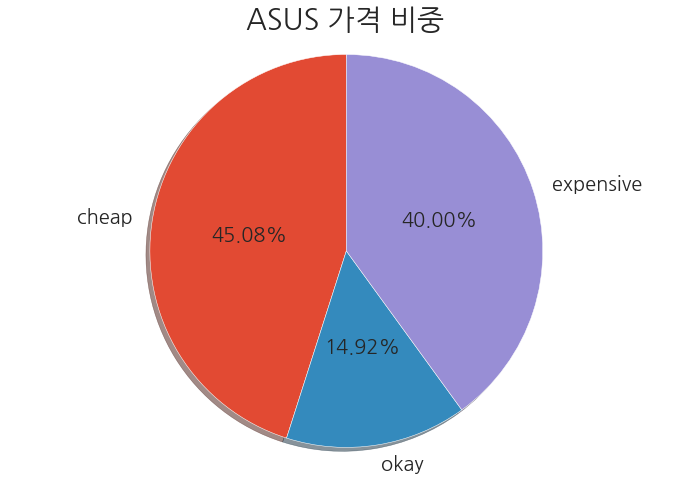

In [458]:
# The slice names of a population distribution pie chart
plt.figure()

pieLabels = 'cheap','okay','expensive'

# Population data

share     = [is_it_cheap.iloc[3][0],is_it_cheap.iloc[3][1],is_it_cheap.iloc[3][2]]

fig, ax = plotter.subplots()

# Draw the pie chart

ax.pie(share,  labels=pieLabels, autopct='%1.2f%%', startangle=90,shadow=True ,pctdistance = 0.5)
plt.title('ASUS 가격 비중')
# Aspect ratio - equal means pie is a circle
mpl.rcParams['font.size'] = 20.0

ax.axis('equal')

plt.show()

# Learning Curve 그리기

Automatically created module for IPython interactive environment


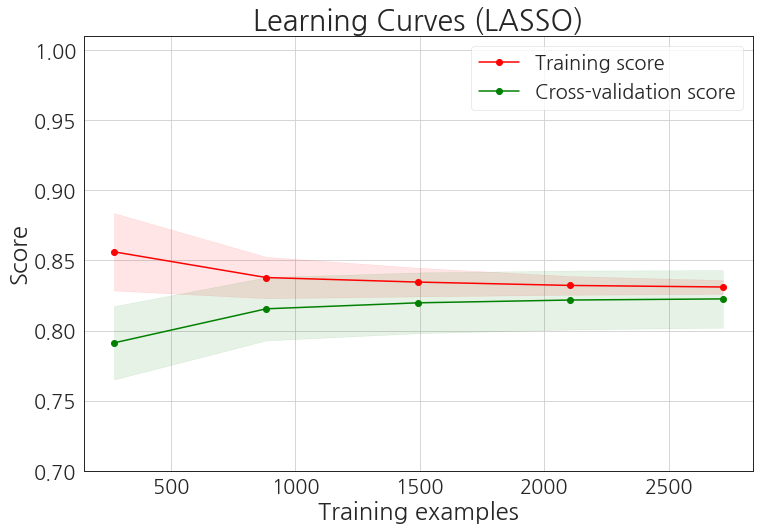

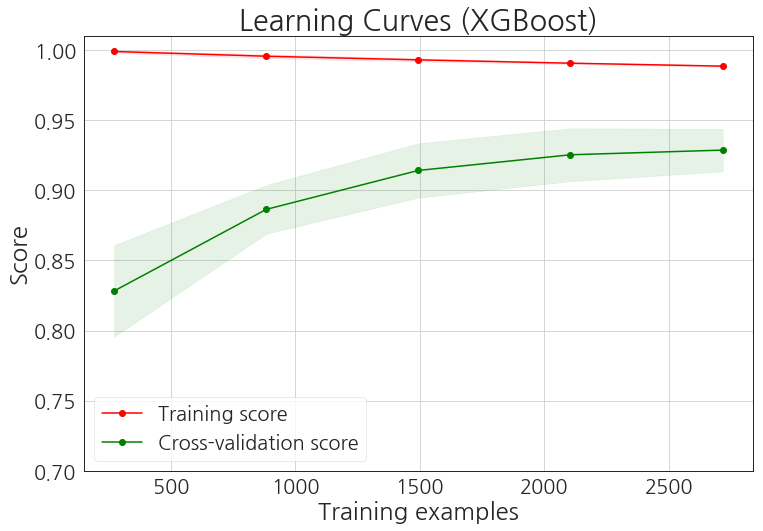

In [249]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = data1[Input],data1[Target]


title = "Learning Curves (LASSO)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = lasso
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (XGBoost)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = best_xgb_model
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()